In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
iris = pd.read_csv('iris.csv')

In [5]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris.apply(lambda x: iris_species[x.species], axis=1) # axis=1 -- for each row 

In [7]:
# create a mapping from iris label value to species to make results easier to interpret
iris_number = dict(zip(iris.species_num.unique(), iris.species.unique()))
iris_number

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [8]:
iris_number

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [15]:
# plotting a scatter matrix
from matplotlib import cm

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#cmap = cm.get_cmap('gnuplot')
#scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

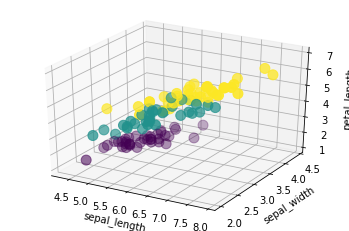

In [16]:
# plotting a 3D scatter plot
#from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['sepal_length'], X_train['sepal_width'], X_train['petal_length'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()

In [28]:
# For this example, we use the mass, width, and height features of each fruit instance
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
y = iris['species_num']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn.score(X_test, y_test)

0.9736842105263158

In [33]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
iris_prediction = knn.predict([[20, 4.3, 5.5]])
iris_number[iris_prediction[0]]

'virginica'

In [ ]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 8, 'uniform')   # we choose 5 nearest neighbors


/Users/anjali/Documents/knn_fruit_classifier/adspy_shared_utilities.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/anjali/Documents/knn_fruit_classifier/adspy_shared_utilities.py:171: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


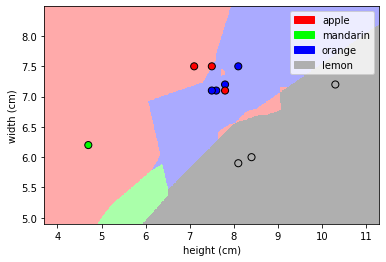

In [16]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 3, 'uniform')   # we choose 5 nearest neighbors


/Users/anjali/Documents/knn_fruit_classifier/adspy_shared_utilities.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/anjali/Documents/knn_fruit_classifier/adspy_shared_utilities.py:171: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


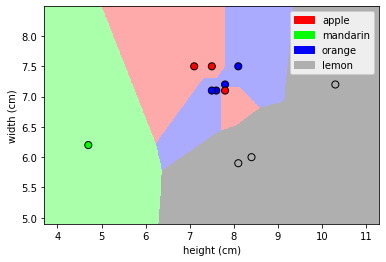

In [17]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 5 nearest neighbors


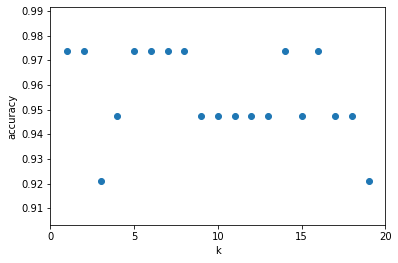

In [36]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

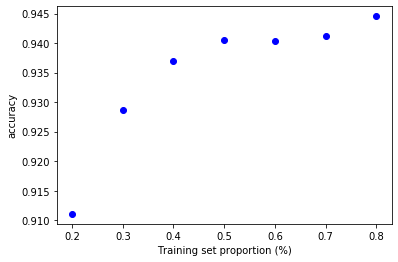

In [37]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');